# <center>**Aggregate Loss Models**</center>
Aggregate claims to produce a portfolio with desirable properties making the risk manageable

In [7]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

---
## **1. Individual risk models**
This aggregate loss model works under the following assumptions
1. The total loss is measured by first fixing the number $n \in \mathbb{N}$ of insurance contracts.
2. The claims $X_1, \ldots, X_n$ by insurance contract are indenpendent, but not necessarily identically distributed.

The aggregate loss is given by adding the claims of each contract, taking into consideration that $\mathbb{E}[X_i] = \mu_i$, for each $i \in \{1,\ldots,n\}$.
\begin{equation}
S = \sum\limits_{i=1}^n X_i
\end{equation}

the expected aggregate loss
\begin{equation}
\mathbb{E}[S] = \sum\limits_{i=1}^n \mathbb{E}[X_i] = \sum\limits_{i=1}^n \mu_i
\end{equation}

the variance of the aggregated loss can be computed by employing the idependency between the $X_1,\ldots,X_n$ variables.
\begin{eqnarray}
\mathbb{V}[S]
& = & \mathbb{Cov}[S,S] \\
\end{eqnarray}

If in addition the claims by insurance contract $X_1,\ldots,X_n$ are identically distributed, the expected values are identical $\mu = \mu_1 = \cdots = \mu_n$, in consequence the expected aggregate loss has the following expression.

\begin{equation}
\mathbb{E}[S] = n \mathbb{E}[X] = n \mu
\end{equation}

The cummulative distribution function of the aggregate loss can be expresed by the convolution of the individual claims
\begin{equation}
F_S = F_{X_1} \ast F_{X_2} \ast \cdots \ast F_{X_n}
\end{equation}

\begin{equation}
( F \ast G ) (x) = \int\limits_{-\infty}^{\infty} F(x - y)G( y )\ dy
\end{equation}

In particular when the functions $F_{X_1},\ldots, F_{X_n}$ are identical, we use the following simplified expression
\begin{equation}
F_X^{\ast n} = F_{X_1} \ast F_{X_2} \ast \cdots \ast F_{X_n}
\end{equation}

### **1. Example**
We consider the case when each claim follows a log-normal distribution, $X_i \rightsquigarrow LN( \mu, \sigma )$ and are independent identically distributed (i.i.d), then for a given number of insurance contracts $n \in \mathbb{N}$.

\begin{equation}
\mathbb{E}[X] = \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

\begin{equation}
\mathbb{E}[S] = n \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

In [8]:
n = 350
u = 6.5
s = 1.5

EX = np.exp( 6.5 + 0.5 * 1.5**2 )
print( "Expected claim E[X]: {:.2f}".format( EX ) )

ES = n * EX
print( "Expected aggregate loss E[S]: {:.2f}".format( ES ) )

Expected claim E[X]: 2048.78
Expected aggregate loss E[S]: 717073.16


---
## **Collective risk model**

\begin{equation}
S = \sum\limits_{i=1}^N X_i
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum\limits_{n=0}^\infty \sum\limits_{i=1}^n \mathbb{E}[X_i] P( N = n )
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum\limits_{n=0}^\infty n \mathbb{E}[X] P( N = n ) = \mathbb{E}[N] \mathbb{E}[X]
\end{equation}

### **2. Example**
Consider $X_i \rightsquigarrow LN( \mu, \sigma )$ and $N \rightsquigarrow Pois( \lambda )$ then
\begin{equation}
\mathbb{E}[X] = \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}

\begin{equation}
\mathbb{E}[S] = \mathbb{E}[N] \mathbb{E}[X] = \lambda \exp\left( \mu + \frac{1}{2}\sigma^2 \right)
\end{equation}


In [3]:
n = 350
lamb = 200
u = 6.5
s = 1.5

EX = np.exp( u + 0.5 * s**2 )
EN = lamb

print( 'Mean claim E[X]: ', EX )
print( 'Mean number claim E[N]: ', EN )

ES = EN * EX 
print( 'Mean total claim E[S]: ', ES )
P = ES / n
print( 'Net premium P: ', P )

Mean claim E[X]:  2048.780465020098
Mean number claim E[N]:  200
Mean total claim E[S]:  409756.0930040196
Net premium P:  1170.7316942971988


---
## **Moment generating**
\begin{equation}
S = \sum_{k=1}^n \sum_{i=1}^{N_k} X_{k,i}
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum_{k=1}^n \sum_{m=0}^\infty \sum_{i=1}^m \mathbb{E}[X_{k,i}] P( N_k = m )
\end{equation}

\begin{equation}
\mathbb{E}[S] = \sum_{k=1}^n \mathbb{E}[X_k]  \sum_{n=0}^\infty m P( N = m ) = \sum_{k=1}^n \mathbb{E}[N_k] \mathbb{E}[X_k] = n \mathbb{E}[N] \mathbb{E}[X]
\end{equation}

\begin{eqnarray}
M_S( \tau ) 
& = & \mathbb{E}\left[ \exp( \tau S ) \right] \\
& = & \sum_{n=0}^\infty \mathbb{E}\left[ \exp( \tau ( X_1 + \cdots + X_n ) ) \middle| N = n \right] P( N = n ) \\
& = & \sum_{n=0}^\infty \mathbb{E}\left[ \exp( \tau X )^n \right] P( N = n ) \\
& = & \sum_{n=0}^\infty M_X( \tau )^n P( N = n ) \\
& = & \mathbb{E}\left[  M_X( \tau )^N \right] \\
& = & \mathbb{E}\bigg[  \exp\bigg( \log( M_X( \tau ) ) N \bigg) \bigg] \\
& = & M_N\bigg(  \log( M_X( \tau ) ) \bigg)
\end{eqnarray}

---
# <center> **Valuation with stochastic simulations** </center>

In [8]:
m = 500
S = np.zeros( m )

for i in range( 0, m ): 
    S[i] = np.sum( np.random.lognormal( mean = u, sigma = s, size = n ) )

ES = np.mean( S )
print( 'Mean total claim E[S]: ', ES )

In [8]:
plt.xlabel( 'Iterations' )
plt.ylabel( 'Gradient norm' )
plt.title( 'Error by iteration' )
# plt.yscale( 'log' )
plt.plot( S )

In [8]:
m = 1000
S = np.zeros( m )

for i in range( 0, m ): 
    N = np.random.poisson( lam = lamb, size = 1 )
    S[i] = np.sum( np.random.lognormal( mean = u, sigma = s, size = N ) )

ES = np.mean( S )
print( 'Mean total claim E[S]: ', ES )

P = ES / n
print( 'Net premium P: ', P )

Mean total claim E[S]:  411597.4877248944
Net premium P:  1175.992822071127


Text(0.5, 1.0, 'My Very Own Histogram')

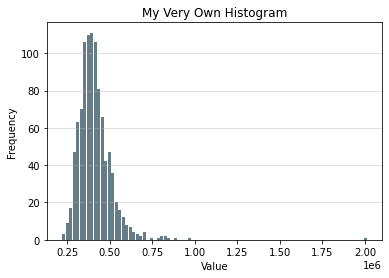

In [10]:
nn, bins, patches = plt.hist( x = S, bins = 'auto', color='#254455', alpha = 0.7, rwidth = 0.85 )
plt.grid( axis = 'y', alpha = 0.5 )
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')